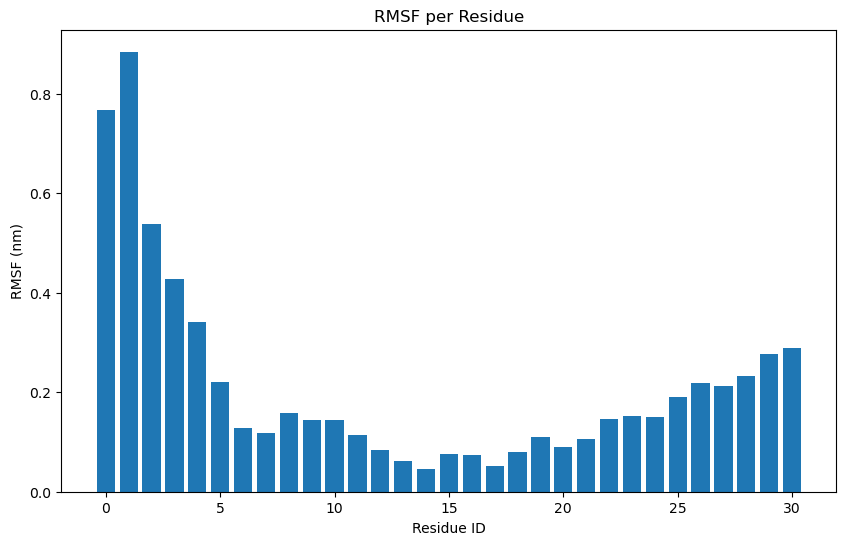

In [15]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import glob

# Use glob to find all PDB files matching the pattern
file_pattern = '/scratch/work/courses/CHEM-GA-2671-2024fa/students/mr6966/comp-lab-class-2024-MR/Week7-Alphafold/1V1D/Predictions/*.pdb'
filenames = glob.glob(file_pattern)

# Load all the protein structures
trajectories = [md.load(filename) for filename in filenames]

# Superimpose all structures to the first structure
reference = trajectories[0]
for traj in trajectories:
    traj.superpose(reference)

# Concatenate all trajectories into a single trajectory
combined_traj = md.join(trajectories)

# Compute RMSF for each residue
rmsf = md.rmsf(combined_traj, reference, atom_indices=reference.topology.select('name CA'))

# Get residue IDs
residue_ids = [residue.index for residue in reference.topology.residues if residue.is_protein]

# Plot RMSF vs Residue ID
plt.figure(figsize=(10, 6))
plt.bar(residue_ids, rmsf)
plt.xlabel('Residue ID')
plt.ylabel('RMSF (nm)')
plt.title('RMSF per Residue')
plt.show()